<a href="https://colab.research.google.com/github/Rahul231100/AIML-2303A51100/blob/main/AIML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo


individual_household_electric_power_consumption = fetch_ucirepo(id=235)


X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets


print(individual_household_electric_power_consumption.metadata)


print(individual_household_electric_power_consumption.variables)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

<ipython-input-21-6d84631372b1>:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?',
<ipython-input-21-6d84631372b1>:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?',
<ipython-input-21-6d84631372b1>:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?',


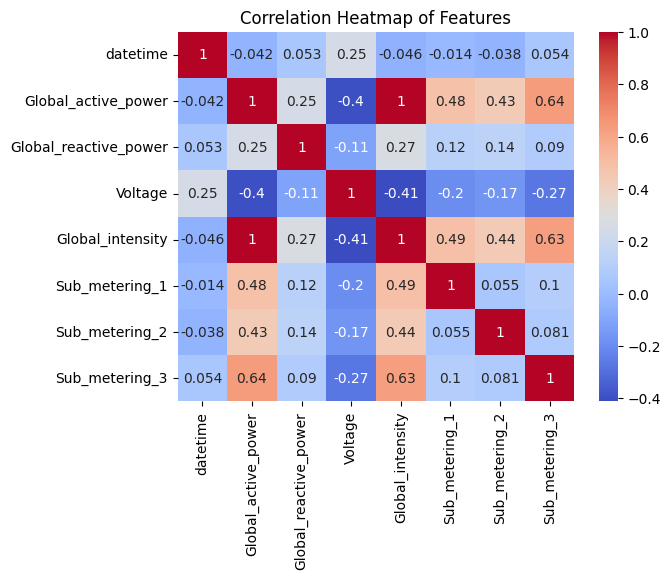

Top 5 reasons for electricity consumption:
Global_active_power    1.000000
Global_intensity       0.998889
Sub_metering_3         0.638555
Sub_metering_1         0.484401
Sub_metering_2         0.434569
Name: Global_active_power, dtype: float64


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?',
                   parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True)


data.dropna(inplace=True)


data['Global_active_power'] = pd.to_numeric(data['Global_active_power'])


correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


top_features = correlation['Global_active_power'].sort_values(ascending=False).head(5)
print("Top 5 reasons for electricity consumption:")
print(top_features)


In [22]:

highest_consumption = data.loc[data['Global_active_power'].idxmax()]
print(f"Highest consumption occurred on {highest_consumption['datetime']} with {highest_consumption['Global_active_power']} kW.")


Highest consumption occurred on 2009-02-22 17:09:00 with 11.122 kW.


In [23]:

max_consumption = data['Global_active_power'].max()
min_consumption = data['Global_active_power'].min()

print(f"Maximum electricity consumption: {max_consumption} kW")
print(f"Minimum electricity consumption: {min_consumption} kW")


Maximum electricity consumption: 11.122 kW
Minimum electricity consumption: 0.076 kW


In [24]:

sub_metering_totals = {
    'Sub_metering_1': data['Sub_metering_1'].sum(),
    'Sub_metering_2': data['Sub_metering_2'].sum(),
    'Sub_metering_3': data['Sub_metering_3'].sum(),
}

highest_sub_metering = max(sub_metering_totals, key=sub_metering_totals.get)
print(f"The sub-metering system with the highest consumption is {highest_sub_metering}, with {sub_metering_totals[highest_sub_metering]} units.")


The sub-metering system with the highest consumption is Sub_metering_3, with 13235167.0 units.


In [25]:

bins = [0, 1, 2, 3, 4, 5, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']
data['Consumption_Range'] = pd.cut(data['Global_active_power'], bins=bins, labels=labels, include_lowest=True)
consumption_counts = data['Consumption_Range'].value_counts()

print("Global electricity consumption counts by range:")
print(consumption_counts)


Global electricity consumption counts by range:
Consumption_Range
0-1    1161268
1-2     582010
2-3     180378
3-4      78583
4-5      29494
5+       17537
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select features for clustering
features = data[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate the clustering model
wcss = kmeans.inertia_  # Within-cluster sum of squares
sil_score = silhouette_score(scaled_features, data['Cluster'])

print(f"WCSS (Inertia): {wcss}")
print(f"Silhouette Score: {sil_score}")
